In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

## List of Historical United States Senators

In [2]:
# URL from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_former_United_States_senators'

# Pull the data from the webpage
response = requests.get(url)

# Load the response into soup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the wikitables
data=soup.find_all('table',{'class':"wikitable"})

# Replace any page breaks with commas for easier processing
df=pd.read_html(str(data).replace("<br/>", ","))

# Build the dataframe
df=pd.DataFrame(df[1])

# Clean the data
df = df[~df['Years'].str.contains('edit')]
df = df[~df['Years'].str.contains('Years')]
df.drop(['Class[2]'], axis =1, inplace=True)

df.head()

,Senator,Years,State,Party,Lifespan
1,Joseph Carter Abbott,1868–1872,North Carolina,Republican,1825–1881
2,James Abdnor,1981–1987,South Dakota,Republican,1923–2012
3,Hazel Abel,1954,Nebraska,Republican,1888–1966
4,James Abourezk,1973–1979,South Dakota,Democratic,1931–
5,Spencer Abraham,1995–2001,Michigan,Republican,1952–


In [3]:
df2 = []

for ind, row in df.iterrows():
    # One of the entries doesn't have a -, so we need to clean it 
    if len(row['Years']) == 8:
        row['Years'] = f"{row['Years'][0:4]}–{row['Years'][4:8]}"
    
    # Factoring in non-consecutive terms
    for yrs in row['Years'].split(","):
        row['Served'] = yrs
        df2.append(dict(row))

df2 = pd.DataFrame(df2)
df2.tail()

,Senator,Years,State,Party,Lifespan,Served
2196,Richard M. Young,1837–1843,Illinois,Democratic,1798–1861,1837–1843
2197,Stephen M. Young,1959–1971,Ohio,Democratic,1889–1984,1959–1971
2198,David Levy Yulee,"1845–1851,1855–1861",Florida,Democratic,1810–1886,1845–1851
2199,David Levy Yulee,"1845–1851,1855–1861",Florida,Democratic,1810–1886,1855–1861
2200,Edward Zorinsky,1976–1987,Nebraska,Democratic,1928–1987,1976–1987


In [4]:
df2['Start'] = df2['Served'].str.split("–").str[0]
df2['End'] = df2['Served'].str.split("–").str[-1]
df2['Birth_Year'] = df2['Lifespan'].str.split("–").str[0].str.split("/").str[0].astype(int)

df2['Start'] = df2['Start'].astype(int)
df2['End'] = df2['End'].astype(int)

In [5]:
df2.head()

,Senator,Years,State,Party,Lifespan,Served,Start,End,Birth_Year
0,Joseph Carter Abbott,1868–1872,North Carolina,Republican,1825–1881,1868–1872,1868,1872,1825
1,James Abdnor,1981–1987,South Dakota,Republican,1923–2012,1981–1987,1981,1987,1923
2,Hazel Abel,1954,Nebraska,Republican,1888–1966,1954,1954,1954,1888
3,James Abourezk,1973–1979,South Dakota,Democratic,1931–,1973–1979,1973,1979,1931
4,Spencer Abraham,1995–2001,Michigan,Republican,1952–,1995–2001,1995,2001,1952


In [6]:
dict_list = []

for year in range(min(df2['Start']), 
                  max(df2['Start']) + 1):
    tmp = df2[(df2['Start'] <= year) & (df2['End'] >= year)]
    for ind, row in tmp.iterrows():
        if row['Senator'] == "John Edwards" and row['Start'] > 1990:
            row['Senator'] = "John Edwards (1999)"
        
        sen_dict = {"Year":year, 
                    "Senator":row['Senator'], 
                    "State":row["State"], 
                    "Party":row['Party'], 
                    "Age": year-row['Birth_Year']}
        dict_list.append(sen_dict)
    

In [7]:
senators = pd.DataFrame(dict_list)

In [8]:
senators[senators["Senator"] == "Ted Kennedy"].head(10)

,Year,Senator,State,Party,Age
13794,1962,Ted Kennedy,Massachusetts,Democratic,30
13902,1963,Ted Kennedy,Massachusetts,Democratic,31
14007,1964,Ted Kennedy,Massachusetts,Democratic,32
14113,1965,Ted Kennedy,Massachusetts,Democratic,33
14215,1966,Ted Kennedy,Massachusetts,Democratic,34
14322,1967,Ted Kennedy,Massachusetts,Democratic,35
14427,1968,Ted Kennedy,Massachusetts,Democratic,36
14537,1969,Ted Kennedy,Massachusetts,Democratic,37
14643,1970,Ted Kennedy,Massachusetts,Democratic,38
14751,1971,Ted Kennedy,Massachusetts,Democratic,39


In [9]:
senators[senators["Year"] == 1992].head(10)

,Year,Senator,State,Party,Age
16888,1992,Brock Adams,Washington,Democratic,65
16889,1992,Daniel Akaka,Hawaii,Democratic,68
16890,1992,Max Baucus,Montana,Democratic,51
16891,1992,Lloyd Bentsen,Texas,Democratic,71
16892,1992,Joe Biden,Delaware,Democratic,50
16893,1992,Jeff Bingaman,New Mexico,Democratic,49
16894,1992,Kit Bond,Missouri,Republican,53
16895,1992,David L. Boren,Oklahoma,Democratic,51
16896,1992,Bill Bradley,New Jersey,Democratic,49
16897,1992,John Breaux,Louisiana,Democratic,48


## List of Current United States Senators

In [10]:
url = 'https://en.wikipedia.org/wiki/List_of_current_United_States_senators'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

data=soup.find_all('table',{'class':"wikitable"})

df=pd.read_html(str(data))

df=pd.DataFrame(df[4])
df.head()

,State,Portrait,Senator,Party,Party.1,Born,Occupation(s),Previous electiveoffice(s),Education,Assumed office,Term up,Residence
0,Alabama,NaN,Richard Shelby,NaN,Republican[2],(age 87),Lawyer,U.S. HouseAlabama Senate,"University of Alabama (BA, LLB) Birmingham Sch...","January 3, 1987",2022,Tuscaloosa[3]
1,Alabama,NaN,Tommy Tuberville,NaN,Republican,(age 67),"College football coachPartner, investment mana...",None,Southern Arkansas University (BS),"January 3, 2021",2026,Auburn
2,Alaska,NaN,Lisa Murkowski,NaN,Republican,(age 64),Lawyer,Alaska House of Representatives,Georgetown University (AB) Willamette Universi...,"December 20, 2002[d]",2022,Girdwood[4]
3,Alaska,NaN,Dan Sullivan,NaN,Republican,(age 57),U.S. Marine Corps officerLawyerAssistant Secre...,Alaska Attorney General,Harvard University (AB) Georgetown University ...,"January 3, 2015",2026,Anchorage[5]
4,Arizona,NaN,Kyrsten Sinema,NaN,Democratic,(age 45),Social workerPolitical activistLawyerCollege l...,U.S. HouseArizona SenateArizona House of Repre...,Brigham Young University (BA) Arizona State Un...,"January 3, 2019",2024,Phoenix[6]


In [11]:
df['Start'] = df['Assumed office'].str.split(",").str[-1].str.split("[").str[0].astype(int)
df['Year_Born'] = 2021 - df['Born'].str.split("age").str[-1].str[1:3].astype(int)
df.head()

,State,Portrait,Senator,Party,Party.1,Born,Occupation(s),Previous electiveoffice(s),Education,Assumed office,Term up,Residence,Start,Year_Born
0,Alabama,NaN,Richard Shelby,NaN,Republican[2],(age 87),Lawyer,U.S. HouseAlabama Senate,"University of Alabama (BA, LLB) Birmingham Sch...","January 3, 1987",2022,Tuscaloosa[3],1987,1934
1,Alabama,NaN,Tommy Tuberville,NaN,Republican,(age 67),"College football coachPartner, investment mana...",None,Southern Arkansas University (BS),"January 3, 2021",2026,Auburn,2021,1954
2,Alaska,NaN,Lisa Murkowski,NaN,Republican,(age 64),Lawyer,Alaska House of Representatives,Georgetown University (AB) Willamette Universi...,"December 20, 2002[d]",2022,Girdwood[4],2002,1957
3,Alaska,NaN,Dan Sullivan,NaN,Republican,(age 57),U.S. Marine Corps officerLawyerAssistant Secre...,Alaska Attorney General,Harvard University (AB) Georgetown University ...,"January 3, 2015",2026,Anchorage[5],2015,1964
4,Arizona,NaN,Kyrsten Sinema,NaN,Democratic,(age 45),Social workerPolitical activistLawyerCollege l...,U.S. HouseArizona SenateArizona House of Repre...,Brigham Young University (BA) Arizona State Un...,"January 3, 2019",2024,Phoenix[6],2019,1976


In [12]:
dict_list = []

for year in range(min(senators['Year']), 
                  max(senators['Year']) + 1):
    
    tmp = df[(df['Start'] <= year)]
    for ind, row in tmp.iterrows():
        sen_dict = {"Year":year, 
                    "Senator":row['Senator'], 
                    "State":row["State"], 
                    "Party":row['Party.1'], 
                    "Age": year-row['Year_Born']}
        dict_list.append(sen_dict)
    

In [13]:
pd.DataFrame(dict_list)

,Year,Senator,State,Party,Age
0,1975,Patrick Leahy,Vermont,Democratic,35
1,1976,Patrick Leahy,Vermont,Democratic,36
2,1977,Patrick Leahy,Vermont,Democratic,37
3,1978,Patrick Leahy,Vermont,Democratic,38
4,1979,Patrick Leahy,Vermont,Democratic,39
...,...,...,...,...,...
1087,2020,Joe Manchin,West Virginia,Democratic,73
1088,2020,Shelley Moore Capito,West Virginia,Republican,66
1089,2020,Ron Johnson,Wisconsin,Republican,65
1090,2020,Tammy Baldwin,Wisconsin,Democratic,58


In [14]:
senators = pd.concat([senators, pd.DataFrame(dict_list)], ignore_index=True)

In [15]:
senators.sample(20)

,Year,Senator,State,Party,Age
13259,1957,Robert S. Kerr,Oklahoma,Democratic,61
3888,1861,Stephen A. Douglas,Illinois,Democratic,48
12343,1948,Arthur V. Watkins,Utah,Republican,62
19203,2008,Debbie Stabenow,Michigan,Democratic,58
15121,1974,Milton R. Young,North Dakota,Republican,77
10984,1936,Royal S. Copeland,New York,Democratic,68
4910,1875,George R. Dennis,Maryland,Democratic,53
17367,1996,Larry Pressler,South Dakota,Republican,54
2929,1848,Walter T. Colquitt,Georgia,Democratic,49
11434,1940,James H. Hughes,Delaware,Democratic,73


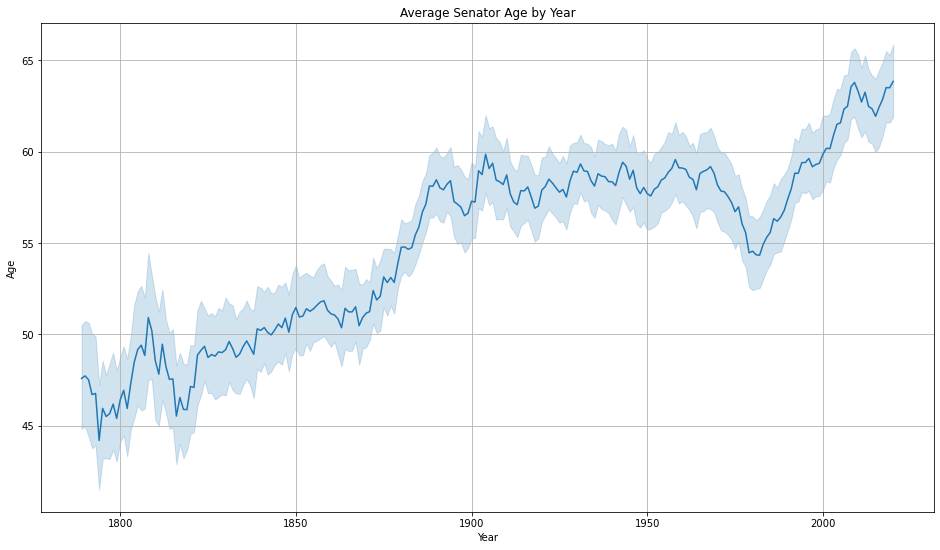

In [16]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = senators['Year'], y = senators['Age'])
plt.title("Average Senator Age by Year");
plt.grid()
plt.show()

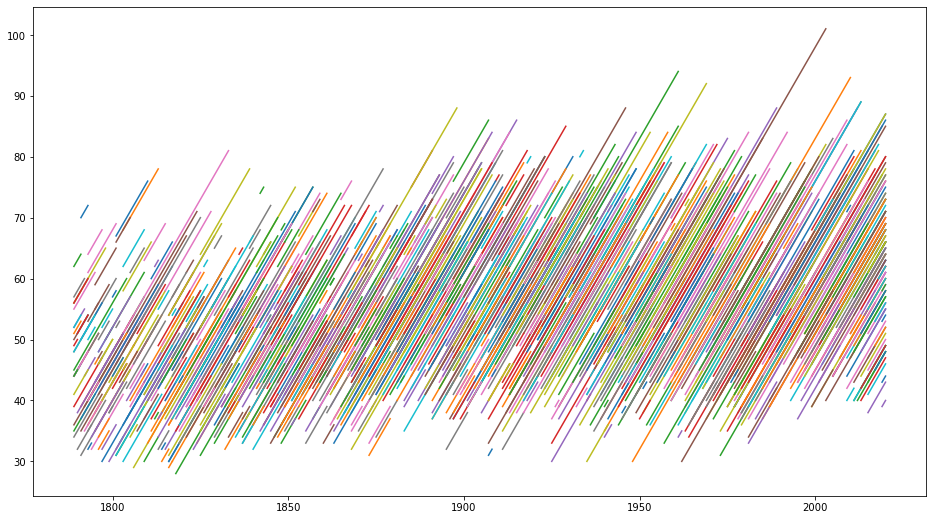

In [17]:
fig, ax = plt.subplots(figsize=(16,9))
for sen, data in senators.groupby('Senator'):
    plt.plot(data['Year'], data['Age'])